<a href="https://colab.research.google.com/github/david7franco/PS4CS/blob/main/Project_Draft_PS4CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [64]:
# Input data files are available in the read-only... imported from Kaggle.
# Instead of using Kaggle API, I downloaded and imported file to my google drive


from google.colab import drive 

drive.mount('/content/drive')

stats = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTPS4CS/PlayerStatsPremierLeague.csv')

stats.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
5,William Saliba,4.0,Arsenal,Defender,France,19.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
6,Sokratis,5.0,Arsenal,Defender,Greece,32.0,44,21,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,18,0,56,1.0
7,Rob Holding,16.0,Arsenal,Defender,England,25.0,41,25,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,32,0.0
8,Shkodran Mustafi,20.0,Arsenal,Defender,Germany,28.0,99,52,26,7,...,NaN,NaN,NaN,NaN,NaN,NaN,28,0,117,7.0
9,Calum Chambers,21.0,Arsenal,Defender,England,25.0,139,47,57,6,...,NaN,NaN,NaN,NaN,NaN,NaN,28,1,137,2.0


In [4]:
# I will add some efficiency using astype() in the near future. 

In [4]:
#This code block functions as a way to group Chelsea's teammates together. 

team = (stats.groupby('Club'))
chelsea = team.get_group('Chelsea')
chelsea.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
115,Kepa Arrizabalaga,1.0,Chelsea,Goalkeeper,Spain,25.0,71,39,20,0,...,16.0,33.0,9.0,22.0,320.0,473.0,2,0,0,NaN
116,Willy Caballero,13.0,Chelsea,Goalkeeper,Argentina,38.0,33,19,5,0,...,15.0,20.0,5.0,16.0,132.0,166.0,0,0,0,NaN
117,Antonio Rüdiger,2.0,Chelsea,Defender,Germany,27.0,80,45,21,5,...,NaN,NaN,NaN,NaN,NaN,NaN,14,0,73,3.0
118,Marcos Alonso,3.0,Chelsea,Defender,Spain,29.0,140,87,32,20,...,NaN,NaN,NaN,NaN,NaN,NaN,25,1,125,16.0
119,Andreas Christensen,4.0,Chelsea,Defender,Denmark,24.0,59,29,18,0,...,NaN,NaN,NaN,NaN,NaN,NaN,6,1,35,1.0


<ipython-input-6-faf59fec1266>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Players')

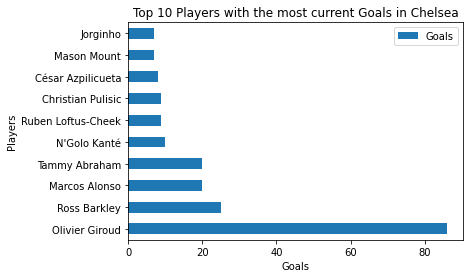

In [6]:
# A team I have some interest in (not really but) is Chelsea, so I thought to group and see who has scored the most goals on their *current* team


#Pie charts and bar graphs are used for qualitative data. I mainly focused on qualitiative data, as I feel that is what best represents most 
# of the datatyoes for this dataset.


chelsea['Goals'] = chelsea['Goals'].astype('int') 

#ax = plt.figure(figsize=(10,10))
chel = chelsea.sort_values('Goals',ascending=False).head(10)
ax = chel.plot(kind='barh',x='Name', y='Goals',title = 'Top 10 Players with the most current Goals in Chelsea')
ax.set_xlabel("Goals")
ax.set_ylabel("Players")

<ipython-input-7-425eb43500a5>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Players')

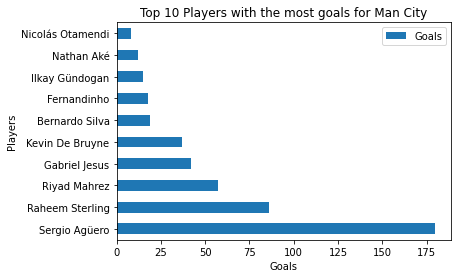

In [7]:
#same thing but with Manchester City. 

team = (stats.groupby('Club'))


man_city = team.get_group('Manchester-City')
man_city.head()

man_city['Goals'] = man_city['Goals'].astype('int') 

city_goals = man_city.sort_values('Goals',ascending=False).head(10)
ax = city_goals.plot(kind='barh',x='Name', y='Goals',title = 'Top 10 Players with the most goals for Man City')
ax.set_xlabel("Goals")
ax.set_ylabel("Players")

Text(0.5, 1.0, 'Top 10 Enlgish Goalscorers')

<Figure size 720x2160 with 0 Axes>

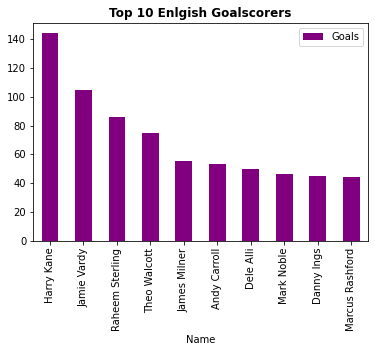

In [8]:
#this shows the Top 10 current english goalscorers that are currnetly playing.

nationality = stats.loc[stats['Nationality'] == 'England']
nationality

eng = nationality[['Name','Goals']]


allGoals = eng.sort_values('Goals',ascending=False).head(10)
ax = plt.figure(figsize=(10,30))

ax = allGoals.plot(kind='bar', x='Name',y='Goals', color = 'Purple')
ax.set_title('Top 10 Enlgish Goalscorers',weight= 'bold')




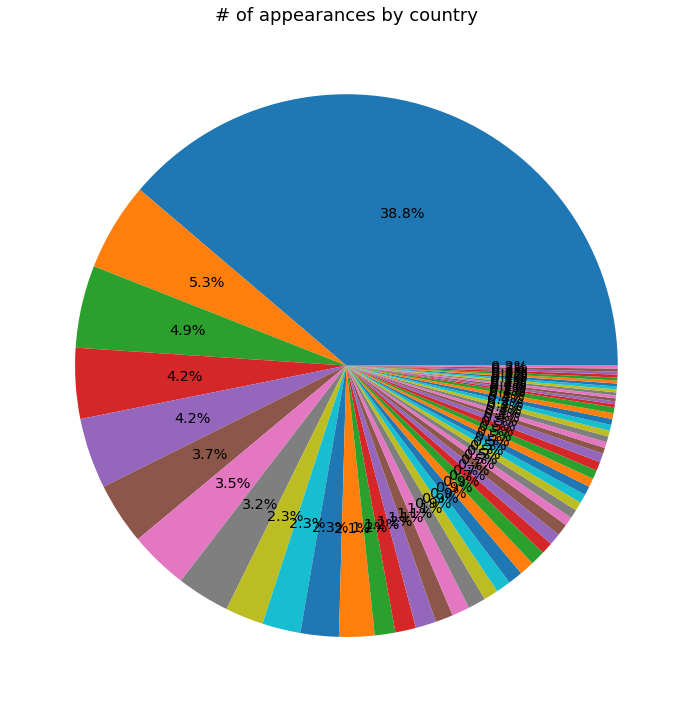

In [34]:
#Pie charts and bar graphs are used for qualitative data.

fig, ax = plt.subplots(figsize=(10, 10))
appearances = stats['Nationality'].value_counts()

#for some reason i cannot get the name of the country to popup, which would in theory be the nationality.
myLables = stats['Nationality']

ax.pie(appearances,
       autopct='%.1f%%',
       textprops={'size': 'x-large'})
ax.set_title('# of appearances by country', fontsize=18)
plt.tight_layout()


TypeError: ignored

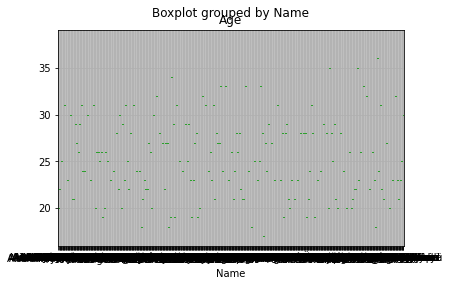

In [67]:
#this shows players age via boxplot
#still a work in progress, cannot get it to work.

#stats['Age'].plot(kind='box')

#going with this for the time being, will tune later.
stats.boxplot(column = "Age", by= 'Name')
